# **Autoencoders para detección de anomalías**

In [1]:
COLAB = True

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.datasets import mnist, fashion_mnist

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

In [3]:
def plot_image(image, cmap="binary"):
    plt.imshow(image, cmap=cmap)
    plt.axis("off")

def show_model(model):
    if not COLAB:
        display(SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg')))
    else:
        display(SVG(model_to_dot(model, show_shapes=True, dpi=72).create(prog='dot', format='svg')))

In [71]:
#(X_trval, y_trval), (X_test, y_test) = mnist.load_data()
(X_trval, y_trval), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_valid = X_trval[:-5000], X_trval[-5000:]
y_train, y_valid = y_trval[:-5000], y_trval[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


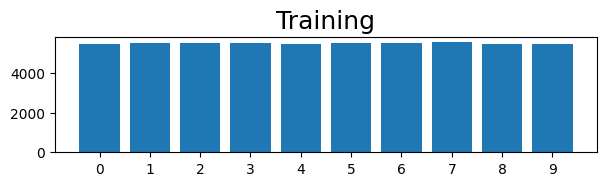

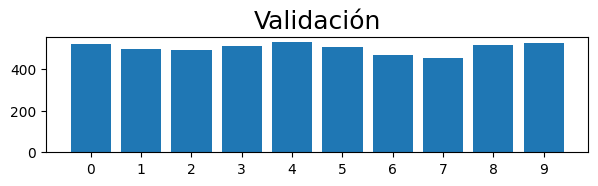

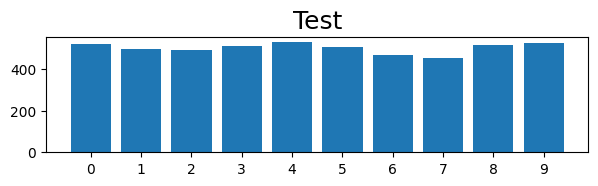

In [72]:
def show_ests(y, title=None):
    clases, counts = np.unique(y, return_counts=True)
    plt.figure(figsize=(7,1.5))
    plt.bar(clases, counts)
    if title:
        plt.title(title, fontsize=18)
    plt.xticks(clases)
    plt.show()

show_ests(y_train, title="Training")
show_ests(y_valid, title="Validación")
show_ests(y_valid, title="Test")

In [73]:
print()
print(np.unique(y_valid))
print(np.unique(y_train))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [74]:
X_train.shape

(55000, 28, 28)

In [75]:
X_train.min(), X_train.max()

(0, 255)

In [76]:
X_train = X_train.astype('float32') / 255
X_valid = X_valid.astype('float32') / 255
X_test = X_test.astype('float32') / 255
print(X_train.shape)
print(X_test.shape)

(55000, 28, 28)
(10000, 28, 28)


In [77]:
X_train.min(), X_train.max()

(0.0, 1.0)

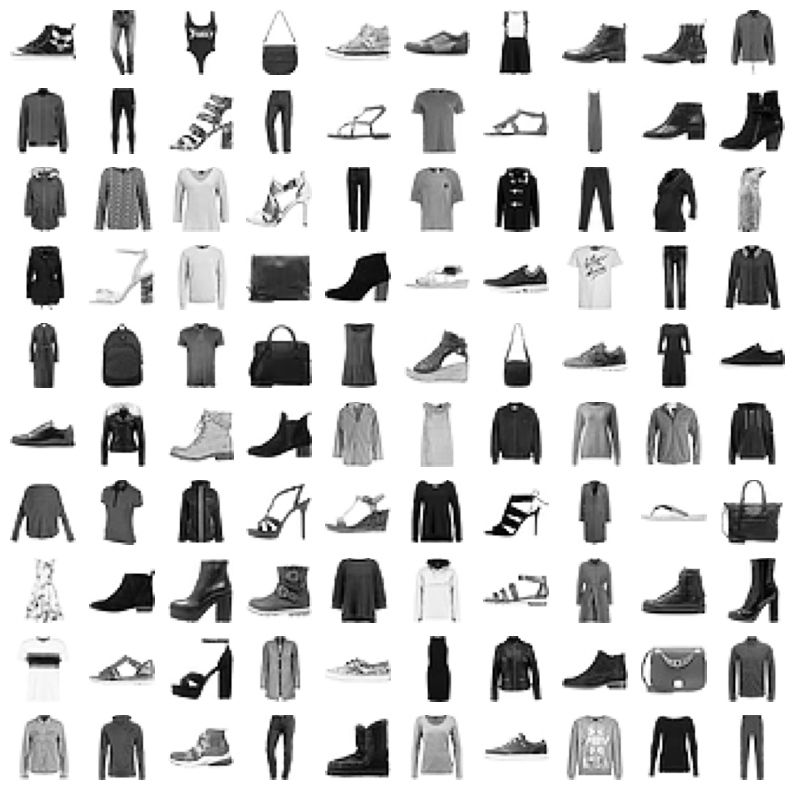

In [78]:
nrows=10
ncols=10

inds = np.random.randint(0, len(X_train), nrows*ncols)

plt.figure(figsize=(10,10/ncols*nrows))
for i,ind in enumerate(inds):
    plt.subplot(nrows, ncols, i+1)
    plot_image(X_train[ind], cmap="Greys")

## **Encoder - decoder**

In [79]:
# completar

In [80]:
X_train.shape

(55000, 28, 28)

In [81]:
# paso de imágenes a vectores:
X_train2 = X_train.reshape( (len(X_train), -1) )
X_test2  = X_test.reshape( (len(X_test), -1) )
X_train2.shape

(55000, 784)

In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100) # encoder. Cuello de botella: 5 neuronas
pca.fit(X_train2)

PCA(n_components=100)

In [83]:
50/784

0.06377551020408163

In [84]:
# Comprimo las imágenes:
# (Encoder)
X_test_pca = pca.transform(X_test2)

In [85]:
pca.explained_variance_ratio_

array([0.29037932, 0.177684  , 0.06020421, 0.0496458 , 0.03847964,
       0.03448841, 0.02334147, 0.01904554, 0.01348852, 0.01314121,
       0.00992617, 0.00911589, 0.00767055, 0.00659139, 0.00607527,
       0.00592088, 0.0055163 , 0.00523384, 0.00457948, 0.00453902,
       0.00433456, 0.00406745, 0.00385294, 0.00372412, 0.00361491,
       0.00352165, 0.00333574, 0.00320256, 0.00308684, 0.00292584,
       0.00275821, 0.00265425, 0.00263647, 0.00255489, 0.00246811,
       0.00235037, 0.00230353, 0.00225507, 0.00218504, 0.00208564,
       0.00200124, 0.00195536, 0.00194702, 0.00182749, 0.00175322,
       0.00172745, 0.00168876, 0.00163722, 0.00161384, 0.0015524 ,
       0.00152381, 0.00149732, 0.0014711 , 0.00143224, 0.00138488,
       0.00136699, 0.00131123, 0.00128374, 0.00127464, 0.0012592 ,
       0.00121216, 0.00120032, 0.00117951, 0.0011635 , 0.00115117,
       0.00112421, 0.00111401, 0.00109255, 0.00105048, 0.00104558,
       0.00102752, 0.00100995, 0.00097515, 0.00095229, 0.00093

In [86]:
X_test_pca.shape

(10000, 100)

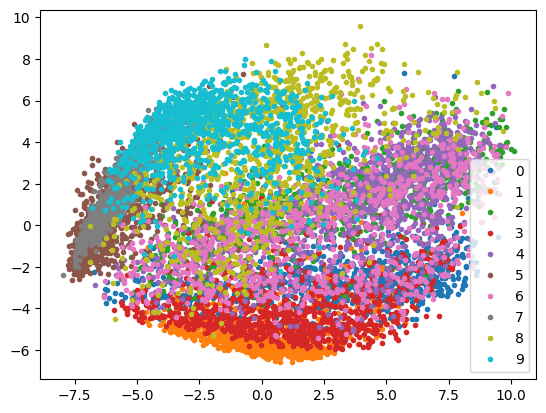

In [87]:
# Visualizo a 2 dimensiones:

for digito in range(10):
  aux = (y_test == digito) # filtro (selecciono solo imágenes de clase=digito)
  plt.plot(X_test_pca[aux, 0], X_test_pca[aux, 1], ".", label=digito)
plt.legend();

In [88]:
X_test_pca[:5]

array([[-5.83294535e+00,  2.55302882e+00, -1.05570602e+00,
         3.21438789e-01,  4.54515219e-02, -4.30136859e-01,
        -1.03833771e+00, -1.06580675e+00,  1.09490061e+00,
        -1.58684039e+00, -3.77614915e-01,  4.14491475e-01,
         4.78345782e-01, -2.78888971e-01, -1.69208586e-01,
         1.21720821e-01, -4.10142303e-01,  5.28226912e-01,
         4.79744673e-02, -1.32780150e-01,  8.96439970e-01,
        -1.55781135e-01,  7.79640734e-01, -5.94184160e-01,
        -6.13111436e-01, -4.31430221e-01, -3.64994437e-01,
         3.36333632e-01,  4.21288908e-01, -2.46001303e-01,
         2.46004909e-01, -1.04651421e-01,  3.40298384e-01,
        -2.19517678e-01,  9.59294438e-02,  3.67108732e-01,
        -1.25422502e+00, -8.92489791e-01, -5.41149378e-01,
        -1.15806609e-01,  2.58500278e-01, -3.17917168e-01,
        -3.14361572e-01,  5.85172884e-02,  7.81996399e-02,
         6.68840557e-02,  1.99021876e-01,  1.13455534e-01,
         1.36064664e-02,  2.32232779e-01,  1.87929854e-0

In [89]:
# Descomprimo las imágenes:
# (Decoder)
X_test_rec = pca.inverse_transform(X_test_pca)
X_test_rec.shape

(10000, 784)

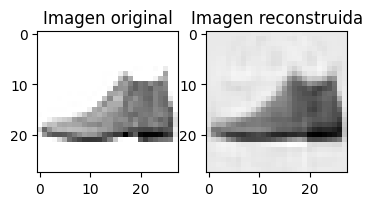

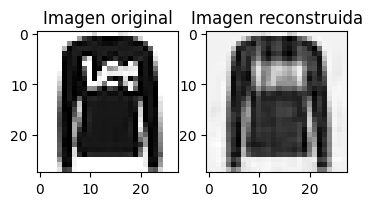

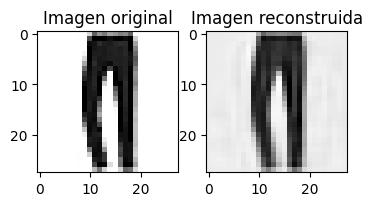

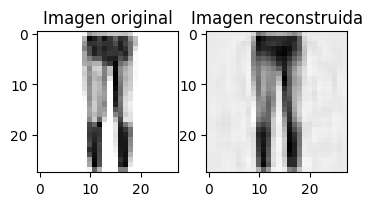

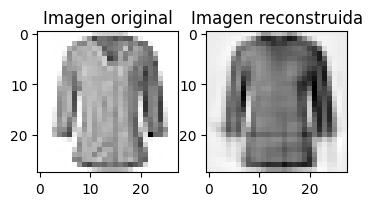

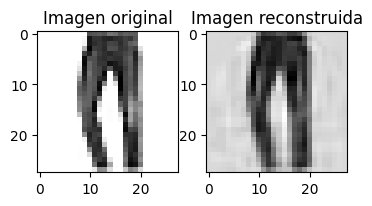

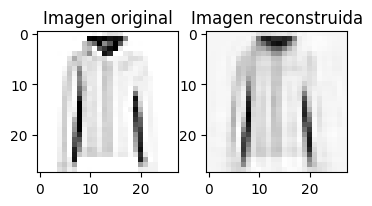

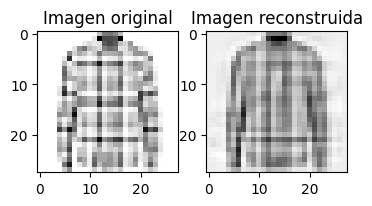

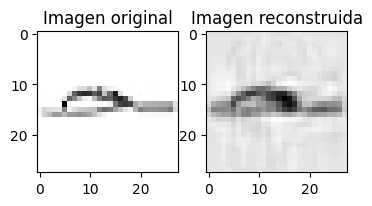

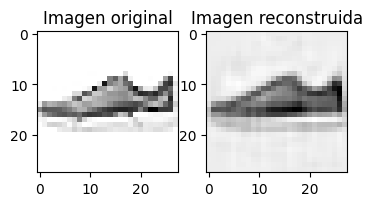

In [90]:
for i in range(10):
  plt.figure(figsize=(2*2,2))
  plt.subplot(1,2,1)
  plt.imshow(X_test[i], cmap="Greys")
  plt.title("Imagen original")
  plt.subplot(1,2,2)
  plt.imshow(X_test_rec[i].reshape(28,28), cmap="Greys")
  plt.title("Imagen reconstruida")
  plt.show()

## Detección de anomalías en test

In [91]:
errores = ((X_test2 - X_test_rec)**2).mean(axis=1) # calculo el ECM de reconstrucción por cada imagen
errores.shape

(10000,)

In [92]:
inds = np.argsort(errores)[::-1] # Índices de imágenes ordenadas por error (de mayor a menor)
inds

array([9067, 1878, 1972, ..., 1395, 9722, 7610])

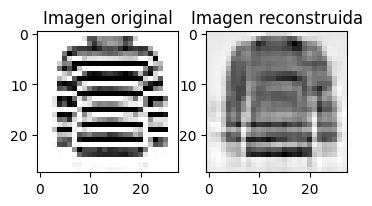

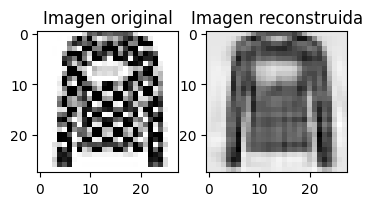

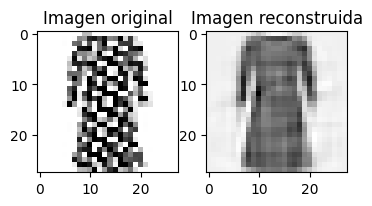

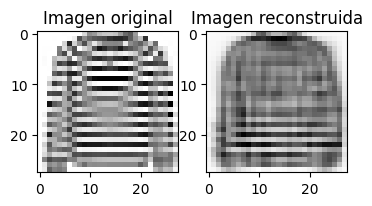

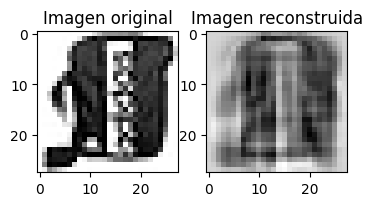

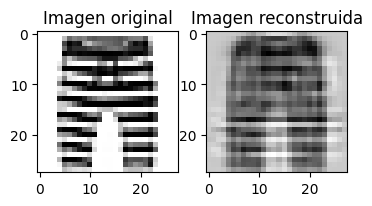

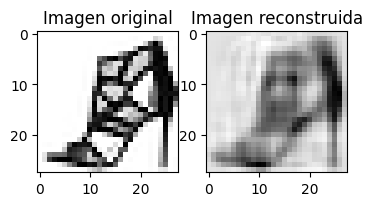

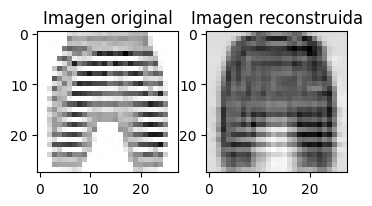

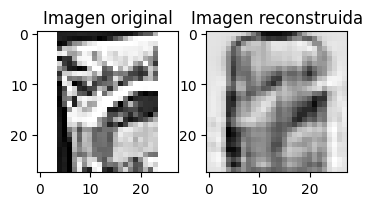

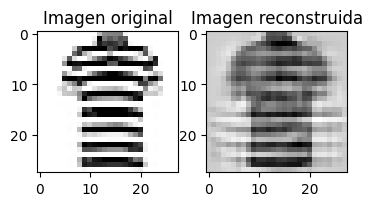

In [93]:
for i in inds[:10]:
  plt.figure(figsize=(2*2,2))
  plt.subplot(1,2,1)
  plt.imshow(X_test[i], cmap="Greys")
  plt.title("Imagen original")
  plt.subplot(1,2,2)
  plt.imshow(X_test_rec[i].reshape(28,28), cmap="Greys")
  plt.title("Imagen reconstruida")
  plt.show()

## Generación imágenes nuevas

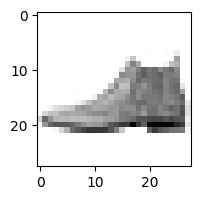

In [94]:
i = 0
plt.figure(figsize=(2,2))
plt.imshow(X_test2[i].reshape((28,28)), cmap="Greys");

In [95]:
X_test_pca[i]

array([-5.8329453 ,  2.5530288 , -1.055706  ,  0.3214388 ,  0.04545152,
       -0.43013686, -1.0383377 , -1.0658067 ,  1.0949006 , -1.5868404 ,
       -0.37761492,  0.41449147,  0.47834578, -0.27888897, -0.16920859,
        0.12172082, -0.4101423 ,  0.5282269 ,  0.04797447, -0.13278015,
        0.89643997, -0.15578113,  0.77964073, -0.59418416, -0.61311144,
       -0.43143022, -0.36499444,  0.33633363,  0.4212889 , -0.2460013 ,
        0.24600491, -0.10465142,  0.34029838, -0.21951768,  0.09592944,
        0.36710873, -1.254225  , -0.8924898 , -0.5411494 , -0.11580661,
        0.25850028, -0.31791717, -0.31436157,  0.05851729,  0.07819964,
        0.06688406,  0.19902188,  0.11345553,  0.01360647,  0.23223278,
        0.18792985, -0.12542574,  0.18210062, -0.43010566, -0.0405471 ,
        0.6815536 ,  0.2671774 , -0.10854945, -0.24991643, -0.29139978,
       -0.38185602,  0.02729291,  0.0138046 , -0.19876605, -0.1424433 ,
       -0.04329821, -0.30668548, -0.30630815,  0.2659562 , -0.15

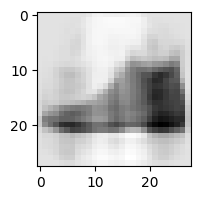

In [99]:
aux = X_test_pca[:(i+1)].copy()
aux[i,1] += 5
aux2 = pca.inverse_transform(aux)

plt.figure(figsize=(2,2))
plt.imshow(aux2[i].reshape((28,28)), cmap="Greys");